In [1]:
# -*- coding: utf-8 -*-
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

このノートブックの役割
- ResNetの畳み込みブロック特徴量(Block1 ~ Block4)の可視化

#### --- ライブラリ ---

In [2]:
import h5py
import numpy as np
from os.path import join as pj
from os import getcwd as cwd
import torch

# 分類データセットのローダー
from dataset.classification.loader import create_validation_split, load_validation_data
# ResNet
from model.resnet.resnet import ResNet

import matplotlib.pyplot as plt
%matplotlib inline

#### --- コンフィグ ---

In [3]:
class args:
    # 実験名
    experiment_name: str = "crossvalid_20200806_All5to6"
    # データパス
    all_data_path: str = pj(cwd(), "data/all_classification_data", "classify_insect_std_20200806")
    model_root: str = pj(cwd(), "output_model/classification/master_paper/resnet50/b20_lr1e-5", experiment_name)
    # モデルのコンフィグ
    model_name: str = "resnet50" # choice ["resnet18", "resnet34", "resnet50", "resnet101", "resnet152"]
    pretrain: bool = True
    param_freeze: bool = False
    activation_function: str = "ReLU" # choice ["ReLU", "LeakyReLU", "RReLU"]
    decoder: str = None # choice [None, "Concatenate", "FPN"]
    use_dropout: bool = True

In [4]:
dataset_name = args.all_data_path.split('/')[-1]
if dataset_name == 'classify_insect_std':
    args.labels = ['Diptera', 'Ephemeridae', 'Ephemeroptera', 
                   'Lepidoptera', 'Plecoptera', 'Trichoptera']
elif dataset_name == 'classify_insect_std_resizeFAR':
    args.labels = ['Diptera', 'Ephemeridae', 'Ephemeroptera', 
                   'Lepidoptera', 'Plecoptera', 'Trichoptera']
elif dataset_name == 'classify_insect_std_resize':
    args.labels = ['Diptera', 'Ephemeridae', 'Ephemeroptera', 
                   'Lepidoptera', 'Plecoptera', 'Trichoptera']
elif dataset_name == 'classify_insect_std_plus_other':
    args.labels = ['Diptera', 'Ephemeridae', 'Ephemeroptera', 
                   'Lepidoptera', 'Plecoptera', 'Trichoptera', 'Other']
elif dataset_name == 'classify_insect_std_20200806':
    args.labels = ['Diptera', 'Ephemeridae', 'Ephemeroptera', 
                   'Lepidoptera', 'Plecoptera', 'Trichoptera']
elif dataset_name == 'classify_insect_std_20200806_DBSCAN':
    args.labels = ['Diptera', 'Ephemeridae', 'Ephemeroptera', 
                   'Lepidoptera', 'Plecoptera', 'Trichoptera']
elif dataset_name == 'classify_insect_20200806':
    args.labels = ['Diptera', 'Ephemeridae', 'Ephemeroptera', 
                   'Lepidoptera', 'Plecoptera', 'Trichoptera']

#### --- モデルのロード ---

In [5]:
# vis_feature=Trueにすることで、特徴量の可視化が可能に
model = ResNet(args.model_name, len(args.labels), pretrain=args.pretrain, param_freeze=args.param_freeze, vis_feature=True, use_dropout=args.use_dropout, activation_function=args.activation_function, decoder=args.decoder).cuda()
model.load_state_dict(torch.load(pj(args.model_root, "valid_5_best.pth")))

activation_function == ReLU
conv_compression = True
use_dropout == True


#### --- データの作成 ---

In [6]:
with h5py.File(args.all_data_path) as f:
    X = f["X"][:]
    Y = f["Y"][:]
_, ntests = np.unique(Y, return_counts=True)
train_idxs, test_idxs = create_validation_split(Y, 0.2)
xtr, ytr, xte, yte = load_validation_data(X, Y, train_idxs[4], test_idxs[4])

#### 以下は畳み込みブロック特徴量可視化コード

In [7]:
index = 0

In [8]:
vis_image = xte[index]
x = torch.from_numpy(vis_image.transpose(2,0,1).astype("float32"))
x = x[None, :].cuda()
model_features = model(x)
index += 1

#### --- 入力画像 ---

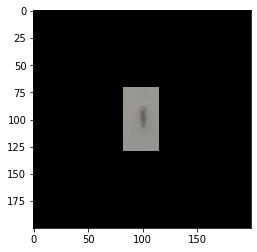

In [9]:
plt.imshow(vis_image.astype("uint8"))

#### --- 畳み込みブロック: 1 ---

In [10]:
block1_index = 0

ブロック1の特徴量


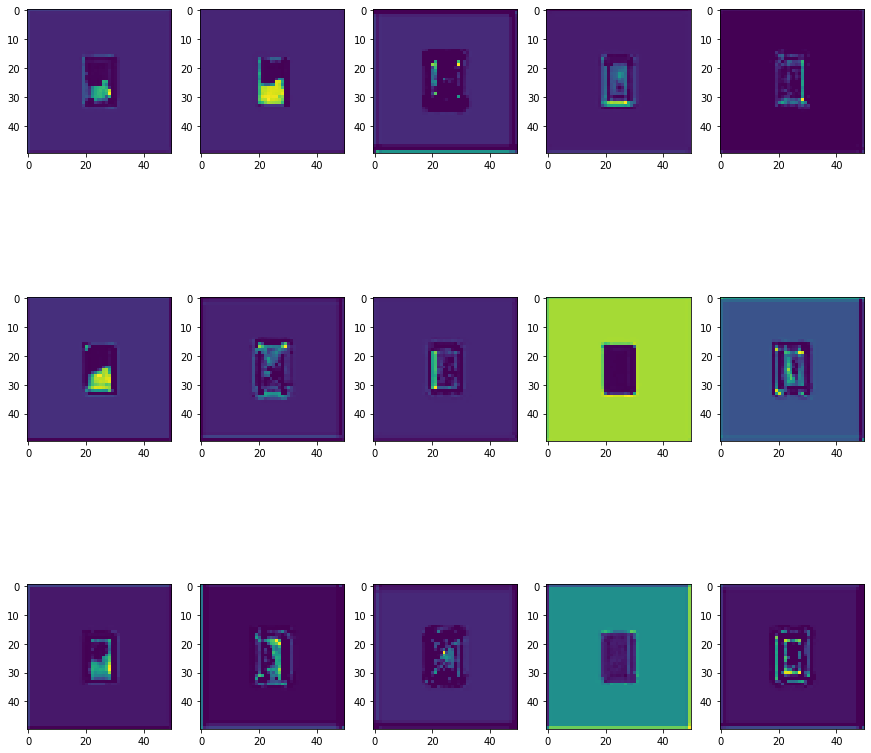

In [11]:
print("ブロック1の特徴量")
fig, axes = plt.subplots(3, 5, figsize=(15,15))
axes[0,0].imshow(model_features['conv_block_1'][0, block1_index].detach().cpu().numpy())
axes[0,1].imshow(model_features['conv_block_1'][0, block1_index + 1].detach().cpu().numpy())
axes[0,2].imshow(model_features['conv_block_1'][0, block1_index + 2].detach().cpu().numpy())
axes[0,3].imshow(model_features['conv_block_1'][0, block1_index + 3].detach().cpu().numpy())
axes[0,4].imshow(model_features['conv_block_1'][0, block1_index + 4].detach().cpu().numpy())
axes[1,0].imshow(model_features['conv_block_1'][0, block1_index + 5].detach().cpu().numpy())
axes[1,1].imshow(model_features['conv_block_1'][0, block1_index + 6].detach().cpu().numpy())
axes[1,2].imshow(model_features['conv_block_1'][0, block1_index + 7].detach().cpu().numpy())
axes[1,3].imshow(model_features['conv_block_1'][0, block1_index + 8].detach().cpu().numpy())
axes[1,4].imshow(model_features['conv_block_1'][0, block1_index + 9].detach().cpu().numpy())
axes[2,0].imshow(model_features['conv_block_1'][0, block1_index + 10].detach().cpu().numpy())
axes[2,1].imshow(model_features['conv_block_1'][0, block1_index + 11].detach().cpu().numpy())
axes[2,2].imshow(model_features['conv_block_1'][0, block1_index + 12].detach().cpu().numpy())
axes[2,3].imshow(model_features['conv_block_1'][0, block1_index + 13].detach().cpu().numpy())
axes[2,4].imshow(model_features['conv_block_1'][0, block1_index + 14].detach().cpu().numpy())
block1_index += 15

#### --- 畳み込みブロック: 2 ---

In [12]:
block2_index = 0

ブロック2の特徴量


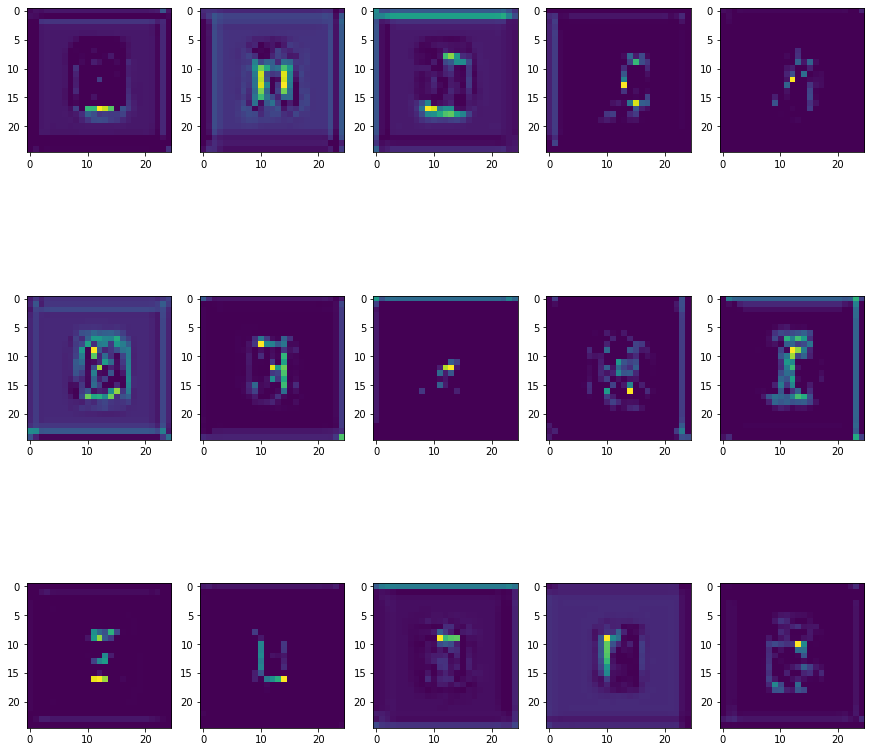

In [13]:
print("ブロック2の特徴量")
fig, axes = plt.subplots(3, 5, figsize=(15,15))
axes[0,0].imshow(model_features['conv_block_2'][0, block2_index].detach().cpu().numpy())
axes[0,1].imshow(model_features['conv_block_2'][0, block2_index + 1].detach().cpu().numpy())
axes[0,2].imshow(model_features['conv_block_2'][0, block2_index + 2].detach().cpu().numpy())
axes[0,3].imshow(model_features['conv_block_2'][0, block2_index + 3].detach().cpu().numpy())
axes[0,4].imshow(model_features['conv_block_2'][0, block2_index + 4].detach().cpu().numpy())
axes[1,0].imshow(model_features['conv_block_2'][0, block2_index + 5].detach().cpu().numpy())
axes[1,1].imshow(model_features['conv_block_2'][0, block2_index + 6].detach().cpu().numpy())
axes[1,2].imshow(model_features['conv_block_2'][0, block2_index + 7].detach().cpu().numpy())
axes[1,3].imshow(model_features['conv_block_2'][0, block2_index + 8].detach().cpu().numpy())
axes[1,4].imshow(model_features['conv_block_2'][0, block2_index + 9].detach().cpu().numpy())
axes[2,0].imshow(model_features['conv_block_2'][0, block2_index + 10].detach().cpu().numpy())
axes[2,1].imshow(model_features['conv_block_2'][0, block2_index + 11].detach().cpu().numpy())
axes[2,2].imshow(model_features['conv_block_2'][0, block2_index + 12].detach().cpu().numpy())
axes[2,3].imshow(model_features['conv_block_2'][0, block2_index + 13].detach().cpu().numpy())
axes[2,4].imshow(model_features['conv_block_2'][0, block2_index + 14].detach().cpu().numpy())
block2_index += 15

#### --- 畳み込みブロック: 3 ---

In [14]:
block3_index = 0

ブロック3の特徴量


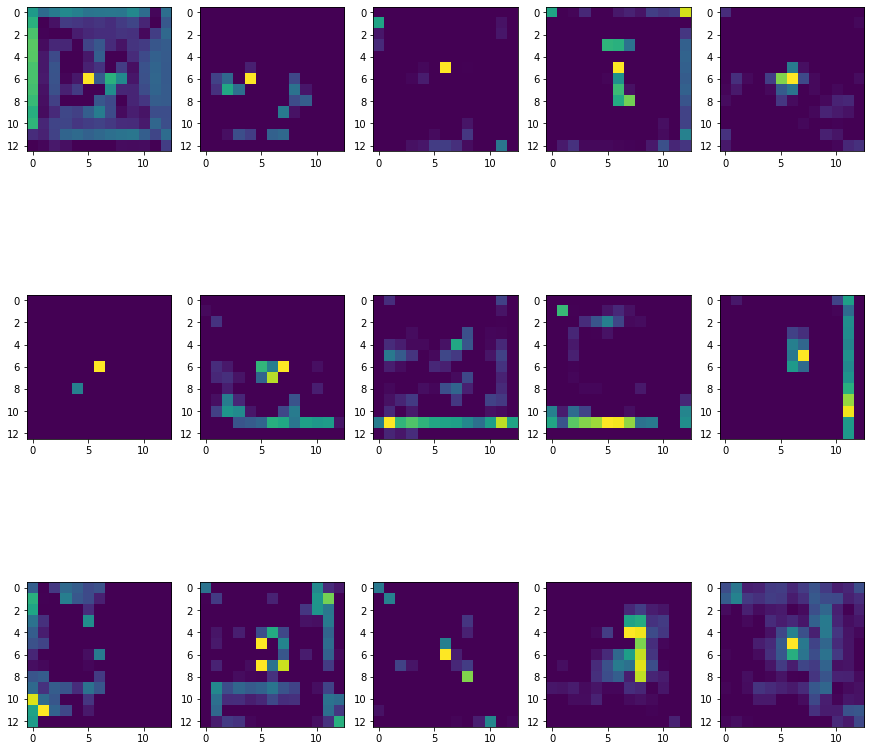

In [15]:
print("ブロック3の特徴量")
fig, axes = plt.subplots(3, 5, figsize=(15,15))
axes[0,0].imshow(model_features['conv_block_3'][0, block3_index].detach().cpu().numpy())
axes[0,1].imshow(model_features['conv_block_3'][0, block3_index + 1].detach().cpu().numpy())
axes[0,2].imshow(model_features['conv_block_3'][0, block3_index + 2].detach().cpu().numpy())
axes[0,3].imshow(model_features['conv_block_3'][0, block3_index + 3].detach().cpu().numpy())
axes[0,4].imshow(model_features['conv_block_3'][0, block3_index + 4].detach().cpu().numpy())
axes[1,0].imshow(model_features['conv_block_3'][0, block3_index + 5].detach().cpu().numpy())
axes[1,1].imshow(model_features['conv_block_3'][0, block3_index + 6].detach().cpu().numpy())
axes[1,2].imshow(model_features['conv_block_3'][0, block3_index + 7].detach().cpu().numpy())
axes[1,3].imshow(model_features['conv_block_3'][0, block3_index + 8].detach().cpu().numpy())
axes[1,4].imshow(model_features['conv_block_3'][0, block3_index + 9].detach().cpu().numpy())
axes[2,0].imshow(model_features['conv_block_3'][0, block3_index + 10].detach().cpu().numpy())
axes[2,1].imshow(model_features['conv_block_3'][0, block3_index + 11].detach().cpu().numpy())
axes[2,2].imshow(model_features['conv_block_3'][0, block3_index + 12].detach().cpu().numpy())
axes[2,3].imshow(model_features['conv_block_3'][0, block3_index + 13].detach().cpu().numpy())
axes[2,4].imshow(model_features['conv_block_3'][0, block3_index + 14].detach().cpu().numpy())
block3_index += 15

#### --- 畳み込みブロック: 4 ---

In [16]:
block4_index = 0

ブロック4の特徴量


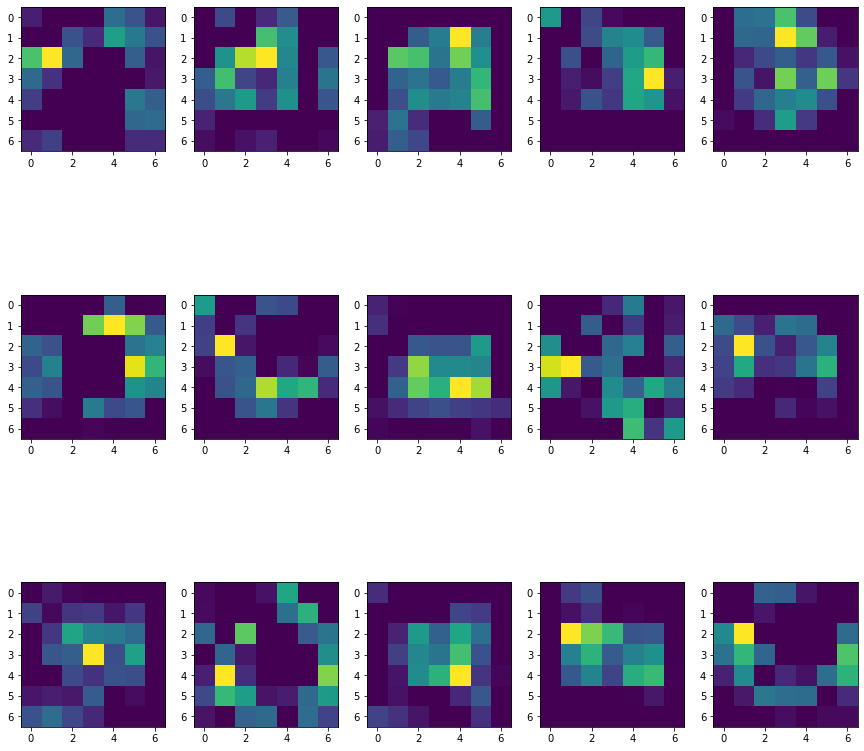

In [17]:
print("ブロック4の特徴量")
fig, axes = plt.subplots(3, 5, figsize=(15,15))
axes[0,0].imshow(model_features['conv_block_4'][0, block4_index].detach().cpu().numpy())
axes[0,1].imshow(model_features['conv_block_4'][0, block4_index + 1].detach().cpu().numpy())
axes[0,2].imshow(model_features['conv_block_4'][0, block4_index + 2].detach().cpu().numpy())
axes[0,3].imshow(model_features['conv_block_4'][0, block4_index + 3].detach().cpu().numpy())
axes[0,4].imshow(model_features['conv_block_4'][0, block4_index + 4].detach().cpu().numpy())
axes[1,0].imshow(model_features['conv_block_4'][0, block4_index + 5].detach().cpu().numpy())
axes[1,1].imshow(model_features['conv_block_4'][0, block4_index + 6].detach().cpu().numpy())
axes[1,2].imshow(model_features['conv_block_4'][0, block4_index + 7].detach().cpu().numpy())
axes[1,3].imshow(model_features['conv_block_4'][0, block4_index + 8].detach().cpu().numpy())
axes[1,4].imshow(model_features['conv_block_4'][0, block4_index + 9].detach().cpu().numpy())
axes[2,0].imshow(model_features['conv_block_4'][0, block4_index + 10].detach().cpu().numpy())
axes[2,1].imshow(model_features['conv_block_4'][0, block4_index + 11].detach().cpu().numpy())
axes[2,2].imshow(model_features['conv_block_4'][0, block4_index + 12].detach().cpu().numpy())
axes[2,3].imshow(model_features['conv_block_4'][0, block4_index + 13].detach().cpu().numpy())
axes[2,4].imshow(model_features['conv_block_4'][0, block4_index + 14].detach().cpu().numpy())
block4_index += 15